#### 0. Labelling Reports for Model Training with Doccano

<img src = 'doccano.png'>

<img src = "doccano.gif" width="750">

#### 1. Import necessary libraries

In [2]:
import os, spacy, random
from arcgis.learn import prepare_data
from arcgis.learn.text import EntityRecognizer
import warnings
#warnings.filterwarnings('Ignore')

#### 2. Prepare the data

In [3]:
data = prepare_data('labelled_crime_reports.json', dataset_type='ner_json')

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\arcgis\learn\models\_arcgis_model.py:450: UserWarning: Cuda is not available
  warnings.warn("Cuda is not available")


In [4]:
data.show_batch()

,text,Address,Crime,Crime_datetime,Reported_date,Reported_time,Reporting_officer,Weapon
0,A Madison mother had her four-year-old son wit...,[3500 block of Anderson St.],[road rage incident],,[01/31/2019],[9:07 AM],[PIO Joel Despain],[crowbar]
1,A knife-wielding woman claimed the man she tri...,"[Capitol Centre Market, 111 N. Broom St.]","[stab, second degree reckless endangerment, be...",,[09/04/2018],[11:08 AM],[PIO Joel Despain],"[knife, nine-inch steak knife]"
2,Members of the Dane County Narcotics Task Forc...,[Badger Road area],"[peddling cocaine and heroin, possession with ...",,[03/12/2019],[12:23 PM],[PIO Joel Despain],[Monday morning]
3,Members of the Dane County Narcotics Task Forc...,[Badger Road area],"[peddling cocaine and heroin, possession with ...",,[03/12/2019],[12:23 PM],[PIO Joel Despain],[Monday morning]
4,Madison Police responded to three different ca...,"[North side of Madison, Crestline Dr, Green Ri...",[windows were shot out],,[10/31/2016],[11:59],[Sgt. Paul Jacobsen],[pellet or soft air gun]
5,The MPD arrested two men last night following ...,"[Alter Metal Recycling, 4400 Sycamore Ave]","[attempted burglary, attempted burglary]",,[03/03/2016],[9:02 AM],[PIO Joel Despain],
6,"A Michigan man, who attempted to swindle the E...",[E. Washington Ave. AT&T store],[attempted to swindle],,[02/17/2016],[12:14 PM],[PIO Joel Despain],
7,Madison Police Officers responded to the 3500 ...,[3500 block of Ridgeway Avenue on Christmas Eve],"[entered their residence, taking all of their ...",[after 7pm],[12/26/2015],[9:43 AM],[P.O. Howard Payne],


#### 3. Training the Model

In [5]:
print(EntityRecognizer.supported_backbones)

['spacy']


In [6]:
ner = EntityRecognizer(data, backbone='spacy')

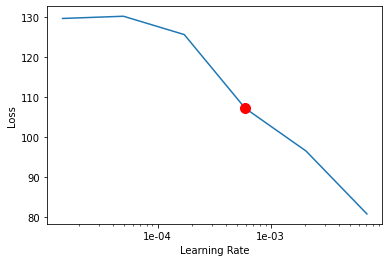

In [7]:
learn_rate = ner.lr_find()

In [8]:
ner.fit(epochs=30, lr=learn_rate)

epoch,losses,val_loss,precision_score,recall_score,f1_score,time
0,73.68,10.73,0.05,0.02,0.03,00:00:03
1,21.4,12.66,1.0,0.17,0.3,00:00:03
2,21.66,10.53,0.74,0.38,0.5,00:00:03
3,18.74,18.81,0.43,0.27,0.33,00:00:03
4,19.67,27.17,0.41,0.13,0.19,00:00:03
5,21.75,14.06,0.43,0.12,0.18,00:00:03
6,22.0,18.84,0.67,0.46,0.54,00:00:03
7,19.68,42.18,0.35,0.15,0.21,00:00:03
8,27.17,22.17,0.48,0.15,0.22,00:00:03
9,22.24,15.68,0.61,0.33,0.43,00:00:03


#### 4. Evaluate the trained model

In [9]:
ner.metrics_per_label()

,Precision_score,Recall_score,F1_score
Crime_datetime,1.00,0.86,0.92
Crime,0.96,0.96,0.96
Reported_date,1.00,0.93,0.97
Reporting_officer,1.00,0.93,0.97
Address,0.94,0.94,0.94
Reported_time,1.00,0.93,0.97
Weapon,0.78,0.78,0.78


In [10]:
ner.show_results()

,TEXT,Filename,Address,Crime,Crime_datetime,Reported_date,Reported_time,Reporting_officer,Weapon
0,Madison Police responded at 22:10 to the 500 b...,Example_0,500 block of South Park Street,"armed robbery,rob",22:10,12/26/2017,5:39 AM,Sgt. Paul Jacobsen,
1,Officers responded to an alarm at Dick's Sport...,Example_1,"Dick's Sporting Goods, 237 West Towne Mall",,,,,,"13 airsoft and pellet guns, which appeared to ..."
2,The MPD arrested an 18-year-old man on a tenta...,Example_2,Memorial High School,disorderly conduct,after 5:30 p.m. yesterday afternoon,05/05/2017,1:55 PM,PIO Joel Despain,
3,A convenience store clerk was robbed at gunpoi...,Example_3,"7-Eleven, 2703 W. Beltline Highway",robbed at gunpoint,,12/14/2017,9:28 AM,PIO Joel Despain,weapon
4,A convenience store clerk was robbed at gunpoi...,Example_3,south on Todd Dr.,robbed at gunpoint,,12/14/2017,9:28 AM,PIO Joel Despain,weapon
5,Madison police officers were dispatched to the...,Example_4,East Towne Mall,"overdosed on heroin,injecting heroin,possessio...",,02/26/2018,7:40 AM,Lt. Jason Ostrenga,"Syringes,"
6,A Sun Prairie woman and her nine-year-old gran...,Example_5,E. Washington Ave.,"crash,drunken driver,hit-and-run",,05/17/2017,10:38 AM,PIO Joel Despain,
7,Madison police officers were dispatched to the...,Example_6,East Towne Mall,"overdosed on heroin,injecting heroin,possessio...",,02/26/2018,7:40 AM,Lt. Jason Ostrenga,"Syringes,"
8,Victim reporting that he was pistol whipped in...,Example_7,3400 block of N Sherman Ave,,,09/18/2017,9:30 PM,Sgt. Rosemarie Mansavage,


#### 5. Save the model

In [11]:
ner.save('docuchief_reports')

Model has been saved to C:\Users\aviparna.biswas\Python Projects\Docuchief\models\docuchief_reports


WindowsPath('C:/Users/aviparna.biswas/Python Projects/Docuchief/models/docuchief_reports')

#### 6. Use the model to extract entities

In [12]:
results = ner.extract_entities('./reports/')

In [13]:
results

,TEXT,Filename,Address,Crime,Crime_datetime,Reported_date,Reported_time,Reporting_officer,Weapon
0,Officers were dispatched to a robbery of the A...,0.txt,Associated Bank in the 1500 block of W Broadwa...,"robbery,demanded money",,08/09/2018,6:17 PM,Sgt. Jennifer Kane,
1,The MPD was called to Pink at West Towne Mall ...,1.txt,Pink at West Towne Mall,thefts,Tuesday night,08/18/2016,10:37 AM,PIO Joel Despain,
2,"The MPD is seeking help locating a unique $1,5...",10.txt,Union St.,stolen,,08/17/2016,11:09 AM,PIO Joel Despain,
3,A Radcliffe Drive resident said three men - at...,100.txt,Radcliffe Drive,handguns,,08/07/2018,11:17 AM,PIO Joel Despain,
4,Madison Police officers were near the intersec...,1001.txt,intersection of Francis Street and State Street,"shooting,disturbance",,08/10/2018,4:20 AM,Lt. Daniel Nale,gunshot
...,...,...,...,...,...,...,...,...,...
2074,"On 6/24/2016, shortly after 2:05am, Madison Po...",995.txt,600 block of University Avenue,,,06/27/2016,11:18 AM,P.O. Howard Payne,battery
2075,Members of the Dane County Narcotics Task Forc...,996.txt,Wintergreen Dr.,,,10/03/2016,12:40 PM,PIO Joel Despain,
2076,"A 42-year-old Oregon, WI, man was arrested for...",999.txt,East Washington Ave.,"operating,possession of a",,04/08/2019,11:11 AM,PIO Joel Despain,
2077,"A 42-year-old Oregon, WI, man was arrested for...",999.txt,"East Washington,","operating,possession of a",,04/08/2019,11:11 AM,PIO Joel Despain,


#### 7. Format the results

In [14]:
e_results = (results.assign(Crime = results['Crime'].str.split(',')).explode('Crime').reset_index(drop=True))
e_results.tail()

,TEXT,Filename,Address,Crime,Crime_datetime,Reported_date,Reported_time,Reporting_officer,Weapon
3170,"A 42-year-old Oregon, WI, man was arrested for...",999.txt,East Washington Ave.,possession of a,,04/08/2019,11:11 AM,PIO Joel Despain,
3171,"A 42-year-old Oregon, WI, man was arrested for...",999.txt,"East Washington,",operating,,04/08/2019,11:11 AM,PIO Joel Despain,
3172,"A 42-year-old Oregon, WI, man was arrested for...",999.txt,"East Washington,",possession of a,,04/08/2019,11:11 AM,PIO Joel Despain,
3173,"A 42-year-old Oregon, WI, man was arrested for...",999.txt,Zeier Rd.,operating,,04/08/2019,11:11 AM,PIO Joel Despain,
3174,"A 42-year-old Oregon, WI, man was arrested for...",999.txt,Zeier Rd.,possession of a,,04/08/2019,11:11 AM,PIO Joel Despain,


In [15]:
e_results.to_csv('labelled_reports.csv')

#### 8. Visualize Entities

In [32]:
def color_gen():
    random_number = random.randint(0,16777215) #16777215 ~= 256x256x256(R,G,B)
    hex_number = format(random_number, 'x')
    hex_number = '#' + hex_number
    return hex_number

In [33]:
colors = {ent.upper():color_gen() for ent in ner.entities}
options = {"ents":[ent.upper() for ent in ner.entities], "colors":colors}

In [46]:
txt = 'The MPD was called to Pink at West Towne Mall Tuesday night after two brazen shoplifters walked out with more than $1,700 worth of merchandise after having been inside the store for less than a minute. A manager told police her corporate office believes the same men are responsible for thousands of dollars worth of thefts at Pink stores in both Wisconsin and Illinois. Anyone with information on their identities can call Madison Area Crime Stoppers at 266-6014. Released 08/18/2016 at 10:37 AM by PIO Joel Despain'

In [47]:
model_folder = os.path.join('models','docuchief_reports')

In [48]:
nlp = spacy.load(model_folder)

In [49]:
doc = nlp(txt)

In [50]:
spacy.displacy.render(doc,jupyter=True, style='ent', options=options)